# Model Building<br/>*Initial EDA*

## Goal
* Perform Exploratory Data Analysis

## Iterative Model Development Series
This is the second in a series of notebooks about iterative model development with Scikit Learn.  The first notebook presented an introduction to the topics.

This notebook describes the first actionable step: Exploratory Data Analysis (EDA).

For concreteness, the Titanic data set will be used.

## Titanic Data Overview

Understanding the domain from which the data came if often very helpful in addition to performing EDA.

This section examines possible causal processes that may have been responsible for survival.  Such an analysis can suggest which variables may contain the most useful information, and which extracted features may be helpful.

Most of the following is based on common sense and various reports of the sinking of the Titanic.

[Wikipedia: Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic)

**Women and Children**  
The Titanic struck an iceberg shortly before midnight in April of 1912.  An order was given that women and children should be given priority access to the life boats, although some crew members heard the order as women and children *only* may board life boats.  This led to a much higher survival rate for women and children.

**Passenger Class**  
In general, first class passengers were on a higher deck than second class passengers who were on a higher deck than third class passengers.  As such, higher class passengers were able to get to the life boats more quickly.

The order to go topside and put on a life belt was given with insufficient time for all passengers to go topside.

First class passengers were personally assisted by crew members in reaching the top deck whereas second and third class passengers were not.

Third class passengers were immigrants who were required to depart at a different destination.  As such, there were physical barriers in place to separate the third class passengers from the first and second class passengers. These barriers made it more difficult to reach the life boats.

The ability to reach the top deck in time depended on
* nearness to the top deck
* assistance from the crew in reaching the top deck
* additional physical barriers that third class passengers had to overcome to reach the top deck

As such, the survival rate for first class is higher than that for second class, which is in turn higher than that for third class.

**Cabin List**  
An incomplete list of which passengers were in which cabins was found on one of the crew members. This list consisted primarily of first and second class passengers.

Speculating, perhaps this was a list of passengers the crew was told to pay special attention to.  If so, then these passengers may have had a higher rate of survival.  

Or perhaps this list is just another way to identify a subset of the first and second class passengers.  If so, it may provide no additional information over that of the passenger class attribute.

The cabin number for passengers on this list, indicates which deck they were on.  However passenger class also indicates which deck a passenger was on.

**Family Size**  
There were more people in need of lifeboats than there were lifeboats.  Family members tended to stick together.  This meant that an entire small family might find room on a lifeboat whereas an entire large family might not.

**Decision Making Process**  
The crew members responsible for putting people on lifeboats had to decide which people were allowed to board.  This decision had to be made in the dark, after midnight, in cold temperatures, in a crisis.  People who rushed out of bed late at night to reach the top deck were likely indistinguishable from one another, aside from gender, age and ability to speak English.

The crew members putting people on life boats probably could not tell how much fare a passenger had paid, what port they had boarded the Titanic on, or what their ticket number or cabin number had been.  Nevertheless, indirect associations between variables are likely.  The ability to reach the top deck in time is associated with passenger class, and passenger class is associated with fare, so a higher fare would likely be associated with a higher survival rate.  The fare attribute may have "noise" in that some passengers may have received a good deal whereas others may have overpaid.

In 1912, gender, age and social status were closely related to a person's title.  "Master" was used for boys, "Mr" for men, "Miss" might refer to a woman of lower class (even if married), "Mrs" might refer to a woman of upper class (even if unmarried).  Other titles were used for those with royalty like status.

A crew member loading people onto life boats at night would be able to distinguish between a boy (Master), a man (Mr), and a woman (Mrs or Miss).  As such, there should be an association between title and survival rate.

### Common Imports and Notebook Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline
sns.set() # enable seaborn style

In [2]:
# Version Information
import sys
print('python:     ', sys.version)
print('numpy:      ', np.__version__)
print('pandas:     ', pd.__version__)
import matplotlib
print('matplotlib: ', matplotlib.__version__)
print('seaborn:    ', sns.__version__)
print('sklearn:    ', sk.__version__)
!lsb_release -d

python:      3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
numpy:       1.16.4
pandas:      0.24.2
matplotlib:  3.1.0
seaborn:     0.9.0
sklearn:     0.21.2
Description:	Ubuntu 18.04.2 LTS


### Acquire Data
Download "train.csv" from: https://www.kaggle.com/c/titanic/data and place it in a data subdirectory.

The above link also has the data dictionary (sometimes called the codebook).

### Read Data
For this example of supervised learning, we will only consider labeled data. The labeled dataset is named "train.csv".

In [3]:
all_data = pd.read_csv('./data/train.csv')
all_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Exploratory Data Analysis
The codebook (aka data dictionary) from: https://www.kaggle.com/c/titanic/data is copied below.

```
Variable    Definition          Key
--------    ----------          -----
Survived    Survival	        0 = No, 1 = Yes
Pclass      Passenger class     1 = 1st, 2 = 2nd, 3 = 3rd
Sex         Sex	
Age         Age in years	
Sibsp       siblings+spouses aboard
Parch       parents+children aboard
Ticket      Ticket number	
Fare        Passenger fare	
Cabin       Cabin number	
Embarked    Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
```

*EDA itself should be performed on a subset of the data.  If a model developer is looking at both the train and test data, then the developer forms an idea in their mind as to how to incorporate the test data into the model. This is a subtle form of "data leakage".*

**As EDA is performed, promising features will be noted in bold.**

In [4]:
# randomly select half the data to explore visually
eda_data = all_data.sample(frac=0.50, random_state=100)
print(f'Length of All Data: {len(all_data)}')
print(f'Length of EDA Data: {len(eda_data)}')

Length of All Data: 891
Length of EDA Data: 446


### Survived vs Sex
As women and children were given preference to the life boats, sex (aka gender) is important to examine.

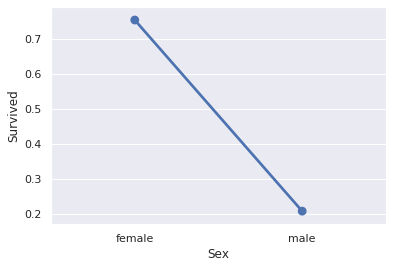

In [5]:
sns.pointplot(x='Sex', y='Survived', data=eda_data, ci=None);

Seaborn is often preferred to matplotlib for EDA as it does a lot of work for you.

In the above, pointplot, Seaborn is grouping the eda_data by Sex, and computing the aggregate mean of Survived for each group.

In [6]:
eda_data.groupby(['Sex']).agg({'Survived':'mean'})

,Survived
Sex,
female,0.754491
male,0.207885


The above shows a huge difference in survival rate between males and females.  
**Sex will likely be an important predictor.**

### Survived vs Passenger Class
As a person's passenger class impacted the ability to get to the life boats in time, passenger class is important to examine.

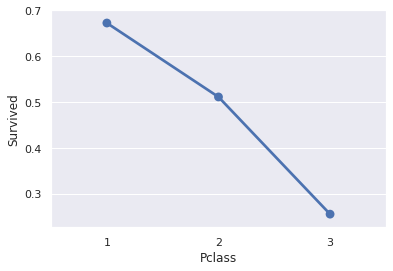

In [7]:
sns.pointplot(x='Pclass', y='Survived', data=eda_data, ci=None);

The above shows a huge difference based on Pclass.  
**Pclass will likely be an important predictor.**

### Survived vs Fare
Fare is strongly associated with passenger class.

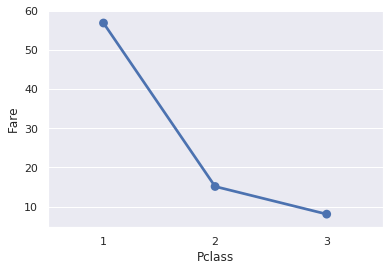

In [8]:
# plot median value of fare per class
sns.pointplot(x='Pclass', y='Fare', data=eda_data, estimator=np.median, ci=None);

In [9]:
eda_data.groupby(['Pclass']).agg({'Fare':'median'})

,Fare
Pclass,
1,56.9292
2,15.1250
3,8.0500


Given that passenger class will be included in the model, including fare may or may not help.  Much of the fare information is already provided to the model by the passenger class feature.  A higher fare may simply mean a better passenger class.  Nevertheless, it is useful to plot Survived vs Fare.

Perhaps the best way to plot Survived vs Fare is with a [lowess](https://en.wikipedia.org/wiki/Local_regression) plot.  This will show the Survival rate in the vicinity of the Fare value on the x-axis.

Seaborn has a limited ability to plot lowess curves using an option to their lmplot function, but it only uses a default lowess curve.  Below the lowess curve from statsmodels will be used, with non default arguments.

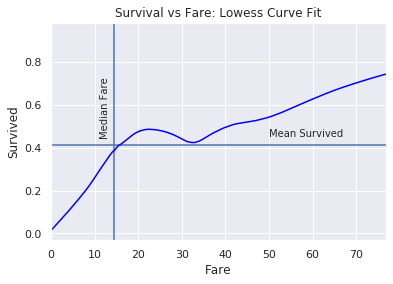

In [73]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# reference values for the plot
survived_mean = eda_data['Survived'].mean()
fare_50, fare_90 = np.quantile(eda_data['Fare'], q=[0.50, 0.90])

# exog is the x-axis, endog is the y-axis
lowess_curve = lowess(exog=eda_data['Fare'], endog=eda_data['Survived'], it=1, frac=0.60)

x = lowess_curve[:, 0]
y = lowess_curve[:, 1]

# fare has a long right tail, only plot 90% of the fare values
fare_90 = np.quantile(eda_data['Fare'], q=[0.90])
plt.xlim(0, fare_90)

# plot vertical line at median fare
plt.axvline(fare_50)
plt.text(11.3,0.45,'Median Fare',rotation=90)

# plot horizontal line at mean survival rate
plt.axhline(survived_mean)
plt.text(50,0.45,'Mean Survived')

plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title("Survival vs Fare: Lowess Curve Fit")
sns.lineplot(x, y, color='blue');

The survival rate increases as the fare increases.  It is nearly monotonic (at the level of smoothing used in the lowess curve).
**Fare may be a good predictor.**

For a given passenger class, paying more than the median fare shows a significantly higher rate of survival.  
**Feature Extraction: Fare below/above median per class may be a good predictor.**

### Survived vs Age
As women and children were given preferential access to the lifeboats, age should be examined.

Age is missing about 20% of its values.

A lowess plot will be made.  Lowess by default discards missing values.

In [13]:
# percent of age values that are missing
eda_data['Age'].isna().mean()

0.19282511210762332

In [14]:
# percent of passengers (in eda data subset) who survived
survived_mean = eda_data['Survived'].mean()
survived_mean

0.4125560538116592

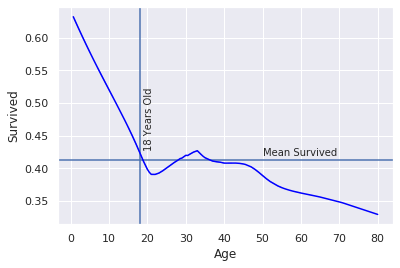

In [15]:
# fit a lowess curve to the data
# exog is the x-axis, endog is the y-axis
age_curve = lowess(exog=eda_data['Age'], endog=eda_data['Survived'],
              it=1, frac=0.80)

x = age_curve[:, 0]
y = age_curve[:, 1]

# add a vertical line at 18 years of age
plt.axvline(18)
plt.text(19,0.43,'18 Years Old',rotation=90)
plt.text(50,0.42,'Mean Survived')

# add a horizontal line at mean survival rate (of the eda_data)
plt.axhline(survived_mean)

plt.xlabel('Age')
plt.ylabel('Survived')
sns.lineplot(x, y, color='blue');

LogisticRegression is a linear function.  It tends to work better if there is a [monotonic](https://en.wikipedia.org/wiki/Monotonic_function) relationship between the predictor and the target.

At the level of lowess smoothing applied, Survived is roughly monotonically increasing with decreasing age.

**Age may be a good predictor.**

LogisticRegression is a linear function.  Sometimes extracting features is helpful to better handle non-linearities in the data.  These extracted features may not be necessary for another model, such as a RandomForest.

**Feature Extraction: Age below/above 18 may be a good predictor.**

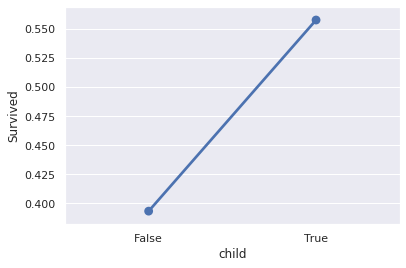

In [16]:
# examine the discretized data
# note: the expression (Age < 18) when Age is null, is False
eda_data['child'] = (eda_data['Age'] < 18)
sns.pointplot(data=eda_data, x='child', y='Survived', ci=None);

The first thing to do when looking at a plot is to look at the scale of the axes.  Seaborn will automatically set axis limits to show all of the data.  The difference here is far smaller than the visually similar looking plot of Survived vs Sex.

In [17]:
# plotted values
eda_data.groupby(eda_data['Age'] < 18).agg({'Survived':'mean'})

,Survived
Age,
False,0.393401
True,0.557692


20% of the Age feature has missing values. This may cause some passengers who are children, not to be identified as such.

Later, missing Age values will be imputed.  As there is another field which conveys information that a passenger is a child (a title of 'Master' means a passenger is a boy), using the imputed Age may do slightly better than the above.

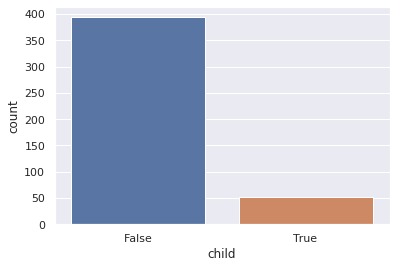

In [18]:
# count information for above
sns.countplot(eda_data['child']);

There are not a lot of children, but for the few children that are there, the survival rate is higher than for adults.

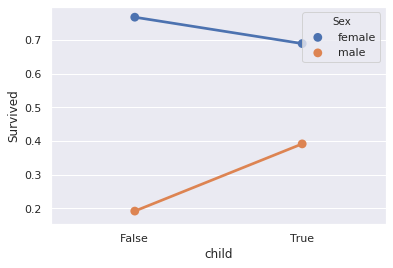

In [19]:
eda_data['child'] = (eda_data['Age'] < 18)
sns.pointplot(data=eda_data, x='child', y='Survived', hue='Sex', ci=None);

The above shows different slopes for male and female.  This suggests an interaction between the two variables.  
**Feature Extraction: (Age < 18) & (Sex = 'male'), may be a good predictor.**  
Later the title "Master" will be extracted from the name field providing essentially the same information.

### Survived vs Embarked

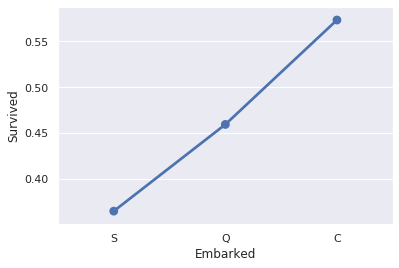

In [20]:
sns.pointplot(x='Embarked', y='Survived', data=eda_data, ci=None);

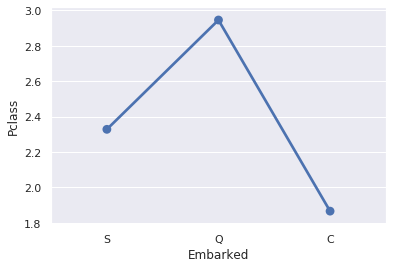

In [21]:
# It seems odd that point of embarkation affects suvival rate
# Perhaps Embarked is associated with Pclass and/or Fare
sns.pointplot(x='Embarked', y='Pclass', data=eda_data, ci=None);

Passengers who embarked at Cherbourg were most likely to survive and were most likely to be in a better (i.e. lower numbered) class.  This makes sense.

Curiously the survival rate for embarking at Queenstown is higher than for embarking at Southampton, and yet almost all passengers from Queenstown were in 3rd class.  This is unexpected.  Perhaps the few Queenstown passengers were placed in a different part of the ship than the other 3rd class passengers.

"Unexpected" information is additional information.  Embarked may be helpful.  However if only a small number of passengers embarked at Queenstown, then the amount of additional information is small.

Speculating as to which features may or may not help a LogisticRegression model is helpful for generating ideas.  However the only way to know for sure if a feature is helpful, is to use it and see if the model's score improves.

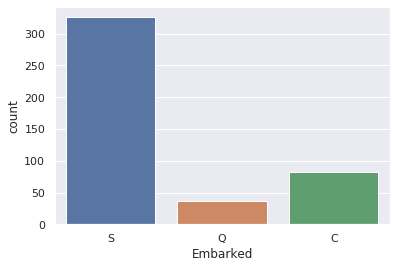

In [22]:
# examine coverage
sns.countplot(x='Embarked', data=eda_data);

**Embarked may be a good predictor.**

### Survived vs Siblings-plus-Spouse and Parents-plus-Children
These are arguablly odd ways to characterize a person.  Probably most people with a spouse on board, do not have a sibling on board.  Probably most people with a parent on board, do not themselves have children on board.

A more meaningful variable might be be:  
Family-Size = Siblings-plus-Spouse + Parents-plus-Children + 1.

#### Survived vs Siblings-plus-Spouse

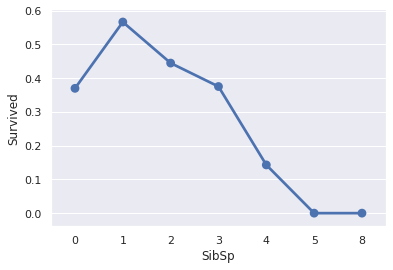

In [23]:
sns.pointplot(x='SibSp',y='Survived',data=eda_data, ci=None);

LogisticRegression, as per the definition of its objective function, tends to work better when there is a monotonic relationship between the response and the predictor.  If each SibSp value were equally likely, this would not be close to monotonic.  However values of 2 or greater are very rare, making the relationship more monotonic than the above plot suggests.

**SibSp may or may not be a good predictor for LogisticRegression.**

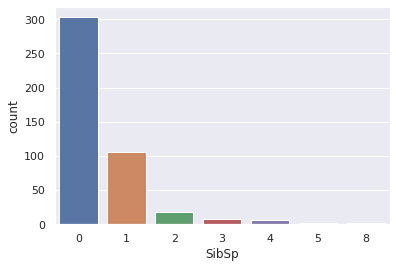

In [24]:
# count information for above
sns.countplot(eda_data['SibSp']);

Most of its values are 0.  It may be better to treat this discrete numeric variable as SibSp == 0 and SibSp > 0.

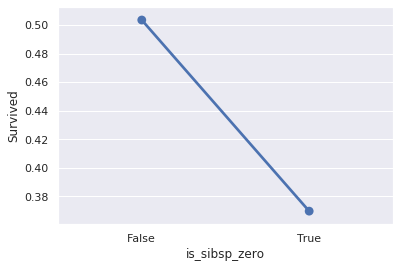

In [25]:
# proposed feature extraction: sibsp == 0
eda_data['is_sibsp_zero'] = (eda_data['SibSp'] == 0)
sns.pointplot(x='is_sibsp_zero', y='Survived', data=eda_data, ci=None);

It is important to look at the scales of the axes.  Seaborn automatically adjusts the scale to avoid extraneous white space.  The difference in survival rate is not nearly as much as in some other plots, such as is_fare_high.

**Extracted Feature: is_sibsp_zero may or may not be good predictor.**

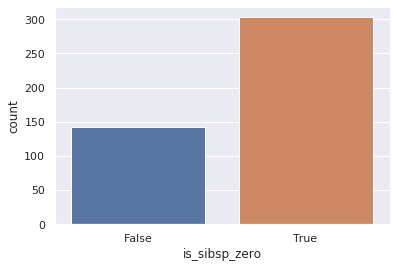

In [26]:
# count information for above
sns.countplot(eda_data['is_sibsp_zero']);

#### Survived vs Parents-plus-Children

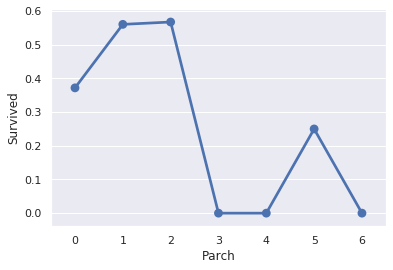

In [27]:
sns.pointplot(x='Parch',y='Survived',data=eda_data, ci=None);

Same discussion as for SibSp.  Larger values are very rare, so this relationship is closer to monotonic than the plot makes it appear.  
**Parch may or may not be a good predictor for LogisticRegression.**

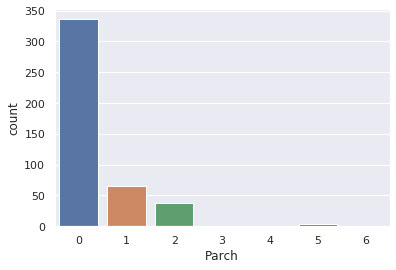

In [28]:
# count information for above
sns.countplot(eda_data['Parch']);

Most of its values are 0.  It may be better to treat this discrete numeric variable as Parch == 0 and Parch > 0.

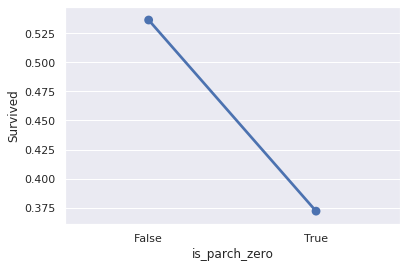

In [29]:
# proposed feature extraction: parch == 0
eda_data['is_parch_zero'] = (eda_data['Parch'] == 0)
sns.pointplot(x='is_parch_zero',y='Survived',data=eda_data, ci=None);

**Extracted Feature: is_parch_zero may be a good predictor.**

#### Survived vs Family Size

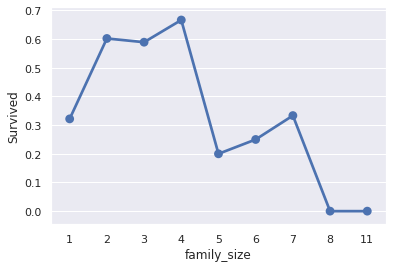

In [30]:
eda_data['family_size'] = eda_data['SibSp'] + eda_data['Parch'] + 1
sns.pointplot(x='family_size', y='Survived', data=eda_data, ci=None);

The above is not close to monotonic, but the number of occurrences of each family size should be taken into account.  For example, if family sizes 5 or above are rare, then the above plot shows a mostly increasing rate of survival with respect to family size for most of the data.

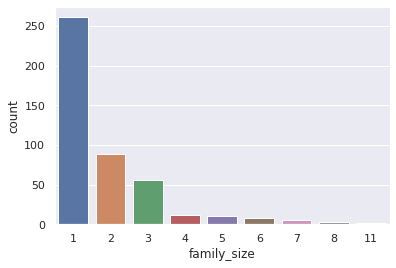

In [31]:
sns.countplot(eda_data['family_size']);

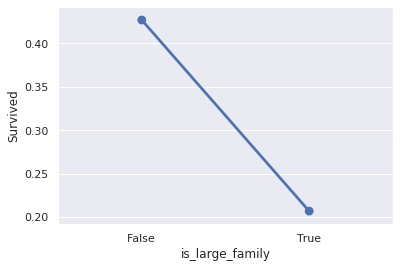

In [32]:
# proposed feature extraction: is_large_family
eda_data['is_large_family'] = (eda_data['family_size'] > 4)
sns.pointplot(x='is_large_family',y='Survived',data=eda_data, ci=None);

This shows a large difference.  
**Extrated Feature: is_large_family may be a good predictor**

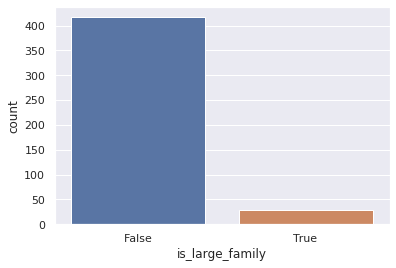

In [33]:
sns.countplot(eda_data['is_large_family']);

There aren't many large families.

### PassengerId, Name, Cabin and Ticket

In [34]:
eda_data[['PassengerId', 'Name', 'Cabin', 'Ticket']].isna().mean()

PassengerId    0.000000
Name           0.000000
Cabin          0.769058
Ticket         0.000000
dtype: float64

Cabin is null 77% of the time.  Perhaps null vs non-null is predictive.

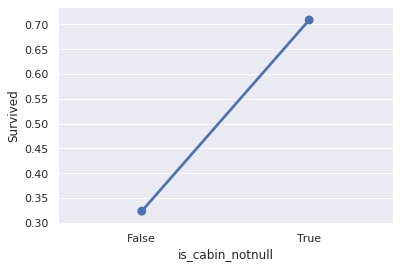

In [35]:
# proposed feature extraction: Cabin is not null
eda_data['is_cabin_notnull'] = (eda_data['Cabin'].notnull())
sns.pointplot(x='is_cabin_notnull',y='Survived',data=eda_data, ci=None);

**Extracted Feature: is_cabin_notnull may be a good predictor.**

In [36]:
eda_data[['PassengerId','Name', 'Ticket']].nunique() / len(eda_data)

PassengerId    1.000000
Name           1.000000
Ticket         0.863229
dtype: float64

100% of the PassengerId's and Name's have distinct values and 86% of the Tickets have unique values.  That's too many distinct values to carry predictive information as is.  However name and Ticket could be parsed to extract potentially useful predictive information.

### Person's Title

In [37]:
eda_data['Name'].head()

205       Strom, Miss. Telma Matilda
44     Devaney, Miss. Margaret Delia
821                Lulic, Mr. Nikola
458              Toomey, Miss. Ellen
795               Otter, Mr. Richard
Name: Name, dtype: object

In [38]:
# title is after the first comma and before the first period
eda_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).value_counts()

Mr          253
Miss         98
Mrs          67
Master       18
Dr            3
Rev           3
Sir           1
Jonkheer      1
Mlle          1
Major         1
Name: Name, dtype: int64

In [39]:
def extract_title(x):
    '''Extract title and map rare values to Other'''
    title = x.split(',')[1].split('.')[0].strip()
    if title not in ['Mr', 'Miss', 'Mrs', 'Master']:
        title = 'Other'
    return title

In [40]:
# extract each person's title from the name column
eda_data['title'] = eda_data['Name'].apply(extract_title)
eda_data['title'].value_counts()

Mr        253
Miss       98
Mrs        67
Master     18
Other      10
Name: title, dtype: int64

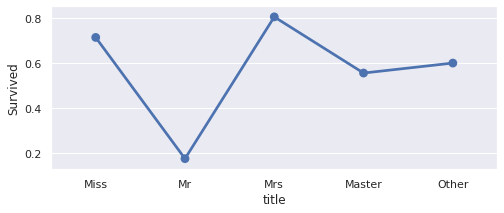

In [41]:
plt.figure(figsize=[8,3])
sns.pointplot(x='title',y='Survived', data=eda_data, ci=None);

**Extracted Feature: title may be a good predictor.**

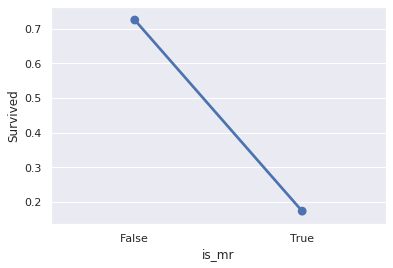

In [42]:
eda_data['is_mr'] = (eda_data['title'] == 'Mr')
sns.pointplot(x='is_mr', y='Survived', data=eda_data, ci=None);

This shows a very large difference in survival rate.  The feature is_mr will not be extracted directly, but as part of encoding title to a set of dummy variables later.

### Model Building Considerations

In [43]:
eda_data.describe().loc[['mean', 'std']]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size
mean,443.890135,0.412556,2.291480,30.060417,0.493274,0.387892,32.253680,1.881166
std,253.412625,0.492847,0.845487,14.455834,0.984692,0.831804,46.086236,1.496589


As per the above, Fare and Age have much higher means and variance than the other variables.

Scikit Learn's LogisticRegression estimator uses regularization by default.  Regularization is helpful for improving model generalizability, but to work well, it needs all the variables to have roughly the same mean and variance.  Therefore if Fare and/or Age is used as an input variable, they should be standardized first.

**If Fare or Age is used, they should be standardized first.  Alternatively, all variables could be standardized for use with LogisticRegression's built-in regularization.**

## Notebook Summary
Initial features that look promising include:
* Sex
* Pclass
* Fare
* Age
* Embarked
* Parch
* SipSp -- maybe

Extracted features that look promising include:
* Fare below/above median per class
* Age below/above 18
* SipSp equal/not-equal 0
* Parch equal/not-equal 0
* is_large_family (family size > 4)
* is_cabin_notnull
* Title